# Linear Regression

## Model Specification

$$y = X\beta + \epsilon$$ 

Here $y\in N\times1$ is a vector of independent variables, $X\in N\times (p+1)$ is the design matrix, usually including the intercept - thus there are $p$ regressors, and $\beta\in p\times 1$ are the intercept or slope coefficients. $E(\epsilon)=0$. 

### Key assumptions and the OLS estimator
The usual Ordinary Least Square *assumptions* are

- A1: **Conditional Independence or Exogeneity** $E(\epsilon_n|x_n)=0$: the error term conditioning on the corresponding regressors (not on other regressors $x_m$ where $m\neq n$) has a mean of zero. If $X$ is normalized, this also implies $X$ is not correlated with $\epsilon$.
- A2: **i.i.d** $(x_n, y_n), n=1,\dots, N$ are i.i.d. (to be relaxed when talking about autocorrelatedness in time-series regression)
- A3: **No outliers**: $X$ and $y$ have nonzero finite fourth moments, i.e. outliers are unlikely. This serves as a reminder that the OLS estimators can be very sensitive to outliers, and hence somehow justifies the need of winsorization - the flooring and ceiling of $X$ and $y$ values at their high- and low-percent quantiles.
- A4: **Full rank of $X$** - no perfect multicolinearity, or $X$ has full rank, otherwise $(X^{T}X)^{-1}$ cannot be found. The definition and implications of imperfect colinearity will be discussed below.
- A5: **Homogeneous Errors**: $var(\epsilon_n|x_n)=\sigma^2$. (Later sections will talk about how to relax this and discuss heterogeneity)
- A6: **Conditional Normality**: $\epsilon_n|x_n \sim N(0, \sigma^2)$ - this alone implies A1 and A5, though not necessarily needed homogeity.

The **Ordinary Least Square estimator** for $\beta$ is $\hat{\beta}=(X^{T}X)^{-1}(X^{T}y)$. 

With the OLS estimates, the **predicted values of $y$** is given by 

$$\hat{y}=X\hat{\beta}=X(X^{T}X)^{-1}X^{T}y,$$

where the matrix $H:=X(X^{T}X)^{-1}X^{T}$ is sometimes called the **hat matrix**, since it puts the hat on $y$. It is also a **projection matrix**, since $\hat{y}$ is an orthogonal projection of $y$ on the linear subspace of $H$ - one consequence is $y-\hat{y}$ is orthogonal to $\hat{y}$. The estimate for $\sigma^2$ is 

$$\hat{\sigma^2}=\frac{1}{N-p-1}\sum_{n=1}^N(y_n-\hat{y_n})^2=\frac{1}{N-p-1}(I-H)y=\frac{1}{N-p-1}SSR$$

See description of SSR below. For the reasons that H is a projection matrix, $\hat{\sigma^2}$ is independent of $\hat{\beta}$.

### Hypothesis Testing

- **Z-score**, or the t statistics for given regressor $\beta_j$: $z_j = \frac{\hat{\beta_j}}{\hat{\sigma}\sqrt{v_j}}$, where $v_j$ is the $j$-th diagonal element of $(X^{T}X)^{-1}$.

 > The Z-score is to test the null hypothesis that $\beta_j=0$.
 
 > Under the null hypothesis, $z_j$ is distributed as $t_{N-p-1}$. If $\hat{\sigma}$ is replaced with $\sigma$, or if $N$ tends to infinity, then $z_j$ become a normal distribution. In practice, since the quantiles of Student's t and normal are similar, people use the normal quantiles oftentimes.
 
 > The above also informs the confidence interval of the single regressor $\beta_j$.

- **F test**, $F=\frac{(RSS_0-RSS_1)/(p_1-p_0)}{RSS_1/(N-p_1-1)}, (p_1>p_0)$ (see definitions of RSS below).

 > The situation is we have a bigger model with $p_1$ regressors, where the baseline model is with $p_0$ regressors. The null hypothesis is the extra $p_1-p_0$ regressors all have loadings of $0$. The F test is often used to 'justify' the linear regression, i.e. to test whether all regressor loadings are zero, or not.
  
 > Under the null hypothesis, and especially A5 and A6, the F statistic will have a $F_{p_1-p_0, N-p_1-1}$ distribution. For large $N$, the quantiles of the $F_{p_1-p_0, N-p_1-1}$ distribution approaches that of $x^2_{p_1-p_0}/(p_1-p_0)$.
 
 > The above relies on A5. The heterogeneity-robust F statistics has a different formula; see Page 714 of < Intro to Econometrics >, 3e. Many software may default to use the homogeneous version of the F statistics, though.
 
 > The above also informs the confidence set of a set of regressors.

It can be shown that the Z-score $z_j$ above is equivalent to the F statistic for dropping the single coefficient $\beta_j$ from the model, in that the F stat is just the square of the Z-score. The key to the proof of this lies in the Gram-Schmidt procedure, which finds the orthogonal vectors that span the sub-space of $X$. $\beta_j/v_j$ above relates to the orthogonal vector $\xi_j$ corresponding to $x_j$; see Page 54 of ESL for more details.

### Regressors subset selection

There are many reasons why one wants to simply select a subset of all regressors.

- Adding unnecessary regressors does not help with the performance of the model, resulting in higher standard errors for other regressors, introducing potential multi-colinearity, and/or reducing the adjust $R^2$.
- Too many regressors brings pressure in efficiently interpreting the results.
- If subset selection is done via regularization methods, it can also be viewed to have the purpose of improving the prediction accurary of the linear regression model.

The 'in-or-out' selection methods are described as follows, and regularizations will be covered next.

- **Best-Subset Selection**

 > **cross-validation**: minimizing the prediction error 
 
 > **AIC/BIC**: one chooses the smallest model that minimizes the KL-divergence vs the 'true model'; see the discussion on these two metrics in a different notebook.
 
- **Forward-stepwise Selection**: start with the intercept, and then greedily adds into the model the regressor the most improve the fit, usually by Z-score.
 > Clever updating algorithms can exploit the QR decomposition for the current fit to rapidly establish the next candidate. Suppose we have the QR decomposition for the $N\times q$ matrix $X_1$ in a multiple regression problem with response
$y$, and we have an additional $p−q$ predictors in the matrix $X_2$. Denote the current residual by $r$. The algorithm then works as follows. 1. Regress $X_2$ on the $Q$ matrix of $X_1$, obtain residuals. 2. Check which residuals decrease MSE the most when $r$ is regressed on it - choose that corresponding variable. 3. Update $Q$ and $r$.

 > Another benefit of the forward-stepwise approach is that it can always be done, even when $p>>N$.

- **Backward-stepwise Selection**: start with all the regressors, and then get rid of one regressor at a time for the least Z-score.

 > Backward selection can only be used when $N>p$, not as universally applicable as the forward approach. 
 
 > Yet empirically the two have similar performance. 
 
- **Forward-Stagewise Selection**: introduced in Chapter 2 in ESL, but is said to be useful particularly in high-dimensional problems.

### Shrinkage Methods

Shrinkage is a form of regularization, especially useful when $p>>N$. Note that shrinkage is *not scale-invariant*, so it is better to scale $X$ first. Also note that in the below, intercept is not included, i.e. **we do not penalize intercept**. The reason is that intercept is usually the mean of the data, and it does not make sense not to let the model learn the sample mean.

- ridge: $\hat{\beta}^{(ridge)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2+\lambda\sum_{j=1}^p\beta_j^2]$

 > An equivalent way to write the ridge regression problem is $\hat{\beta}^{(ridge)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2]$, subject to $\sum_{j=1}^p\beta_j^2\leq t$. There is a one-to-one correspondence between the parameter $\lambda$ above and $t$ here, when $t$ is not too large.
 
 > Ridge regression is equivalent to having a normal prior in Bayesian regression.
 
 > Ridge regression has a closed-form solution: $\hat{\beta}_{ridge}=(X^{T}X+\lambda I)^{-1}X^{T}y$. The solution adds a positive constant to the diagonal of $X^{T}X$ before inversion. This makes the problem nonsingular, even if $X^{T}X$ is not of full rank, and was the main motivation for ridge regression when it was first introduced in statistics. In the case of orthogonal inputs, i.e. when the column vectors of $X$ are orthogonal to each other, the ridge estimates are just a scaled version of the least square estimates: $\hat{\beta}_{ridge}=\hat{\beta}/(1+\lambda)$.
 
 > To view ridge regression under the Singular Value Decomposition (SVD), note that under the SVD: $X=UDV^{T}$, and $X\hat{\beta}=X(X^{T}X)^{-1}X^{T}y=UU^{T}y$. That is, the predicted values from linear regression is simply project $y$ onto the unit principle components (we call $UD$ as the principle components; see the notebook on [PCA](../unsupervised_learning/PCA.ipynb)). The predicted values from ridge regression is different: $X\hat{\beta}^{ridge}=X(X^{T}X+\lambda I)^{-1}X^{T}y=Ud(D^2+\lambda I)^{-1}DU^{T}y=\sum_{j=1}^p u_j\frac{d_j^2}{d_j^2+\lambda}u_j^{T}y$. That is, after getting the coordinates $u_j^{T}y$, it is first shrinked by factors of $\frac{d_j^2}{d_j^2+\lambda}$ before scaling $u_j$. This means that a greater amount of shrinkage is applied to the coordinates of basis vectors with smaller $d_j^2$. Recall that $d_j^2$ are the variation of $X$ along the corresponding principle direction. Thus in this sense, what ridge regression does is to minimize variations along the short directions and preserve large variation along long directions. As such, people define the *effective degrees of freedom* of the ridge regression fit as a generalization of ordinary linear regression: $df(\lambda)=trace(X(X^{T}X+\lambda I)^{-1}X^{T})=\sum_{j=1}^p u_j\frac{d_j^2}{d_j^2+\lambda}$. The larger the $\lambda$, the stronger the regularization effect and the less the effective degrees of freedom.
 
 > Empirically, rather than producing a sparse solution (drive many coefficients to $0$), ridge regression will penalize the largest coefficients, but does not avoid giving many evenly small coefficients.
     

- lasso: $\hat{\beta}^{(lasso)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2+\lambda\sum_{j=1}^p|\beta_j|]$

 > An equivalent way to write the lasso regression problem is $\hat{\beta}^{(lasso)} = argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2]$, subject to $\sum_{j=1}^p|\beta_j|\leq t$. There is a one-to-one correspondence between the parameter $\lambda$ above and $t$ here, when $t$ is not too large.

 > Lasso regression is equivalent to having an exponential prior in Bayesian regression.
 
 > While ridge regression does a proportional shrinkage. Lasso translates each coefficient by a constant factor $\lambda$, truncating at zero. This statement can only be understood intuitively for lasso, since lasso does not have a closed-form solution. Computing the lasso solution numerically, is a quadratic programming problem, but there are efficient algorithms available for computing the entire path of solutions as λ is varied, with the same computational cost as for ridge regression (relating to least angle regression, discussed in Section 3.4.3 in ESL, which also contains further discussions about the effective degrees of freedom).
 
 > Though lasso tends to produce sparse loadings (as to why, see a graph below), and make the designed matrix less ill-conditioned, lasso is not an effective guard against highly-correlated feature space, especially when the two features are of the same scale (Think the extreme case: two feature are equal $x_1=x_2$, then any solution with $|w_1|+|w_2|=k$ are equivalent to lasso, and it also makes the final estimated coefficients highly unstable). As such, it is not immune to overfit noisy features, especially when $p>>N$. One way to get around it is to use [supervised principal component](../unsupervised_learning/PCA.ipynb) to 'de-noise' the observations first.
 
 > To solve lasso efficiently, transform the problem into a QP, by separating the positive and negative parts: $w=w^+-w^-$.
 
 
- elastic net: a convex combination of ridge and lasso in the penalizing term: $= argmin_{\beta}[ \sum_{n=1}^N(y_n-\beta_0-\sum_{j=1}^px_{ij}\beta_j)^2+\lambda(\sum_{j=1}^p\alpha\beta_j^2+(1-\alpha)|\beta_j|)]$
 
 > Empirically it is sometimes hard to distinguish elastic net with penalty term $\sum_{j=1}^p|\beta_j|^q$ for some $q\neq 1,2$.
 
 > The motivation for elastic net or general $q$ as above is to get the best of both worlds: on the one hand, lasso tends to shrink parameters to zero, producing sparse solutions; on the other hand, it may be beneficial that correlated regressors are shrinked together just as ridge would do (recall the extreme example in lasso of $x_1=x_2$). The intuition of the aforementioned behavior of the two shrinkages can be seen in the following graph: When $p>2$, the diamond in lasso becomes a rhomboid, and has many corners, flat edges and faces; there are many more opportunities for the estimated parameters to be zero.
 
 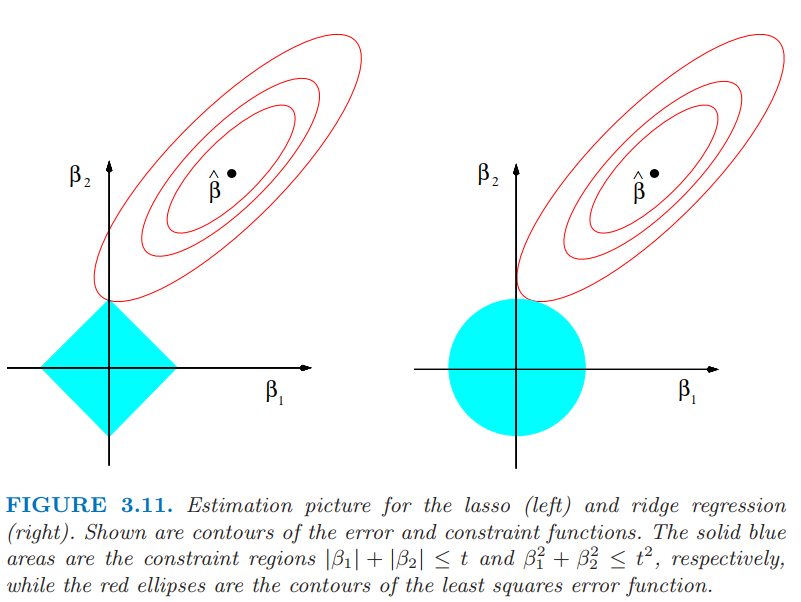
 
 > We have the following theorem to make sure that in elastic net, coefficients with highly-correlated variables tend to shrink together. Let $\rho_{ij}=\hat{corr}(x_i, x_j)$. Suppose $\hat{w}_i$ and $\hat{w}_j$ are selected by elastic net, with $y$ centered and variables $x_1, \dots, x_p$ standardized. If $\hat{w_i}\hat{w_j}>0$, then 
 \begin{align}
 |\hat{w_i}-\hat{w_j}|\leq \frac{|y|\sqrt{2}}{\alpha\lambda}\sqrt{1-\rho_{ij}}.
 \end{align}

### Variants and Generalizations 

...or just different ways to run regressions - there is rocket science around that.

#### Designing for $X$ and $y$ - portfolio sort analysis

In the series of papers, Fama and French performs regression analysis not on the returns of individual stocks, but on returns of sorted portfolios. The stocks are sorted according to its attributes, such as market cap (usually the log of it), book-to-price ratio (also the log of it), and beta (though not done in the Fama-French paper, but is found to be of importance in later studies). $y$ is the excess return (raw return minus the risk-free rate) of these portfolios, while $X$ are taken to be the difference between a high-quantile portfolio less a low-quantile portfolio, e.g. high-value-minus-low-value. 

The benefit of such sorting mechnics, which is also Fama-French's main contributions (not the regression analysis per se) are several fold.
- The sorting itself can be viewed as *non-parametric approach* to discern relations between attributes and asset returns free of the linear assumptions in regression that might distort the results.
- In testing whether some factors explain expected returns or are priced, we need low volatility of regression residuals and preferably for the residuals to have lower correlations, so that we have lower standard errors on betas, or factor loadings. By sorting on characteristics that purported to be informative on alpha, or the cross-sectional difference of expected returns, variance should also be upper-bounded (or you will have infinite Sharpe ratio). Indeed, impressively high $R^2$ were achieved in Fama-French's quantile portfolios (in the $90+\%$), which means not only do they find dispersion on expected returns, but they also find these stocks move together or there exists some correlation structure. 

One drawback though is sorting on more than two attributes can be challenging, and the impact of one attribute controlling others is not as transparent as linear regression. As such, Cochrane famously says that 'we may have to run regressions in some sort'.

< Empircal Asset Pricing > has a chapter that delves into the technical details of sorting, such as what happens when a stock's attribute lies on the borderline of two consecutive quantiles, whether multiple sort should be done independently or conditionally, etc.



#### Time-Series Regression

$$y_t
= \beta_0 + \beta_1y_{t-1} + \beta_2u_{t-2} + \dots + \beta_py_{t-p}
+ \delta_{11}X_{1t-1} + \delta_{12}X_{1t-2} + \dots + \delta_{1q_1}X_{1t-q_1}
+ \dots + \delta_{k_1}X_{kt-1} + \delta_{k2}X_{kt-2} + \dots + \delta_{kq_k}X_{kt-q_k} + u_t,$$

where
 - TS1: $E(u_t| y_{t-1}, y_{t-2}, \dots, X_{1t-1}, X_{1t-2}, \dots, X_{kt-1}, X_{kt-2}, \dots) = 0$
 - TS2: (a) The random variables $(y_t, X_{1t}, \dots, X_{kt})$ have a stationary distribution (strong stationarity), and (b) $(y_t, X_{1t}, \dots, X_{kt})$ and $(y_{t-j}, X_{1t-j}, \dots, X_{kt-j})$ become independent as $j$ gets large (weak independence).
 - TS3: large outliers are unlikely: all $X$ and $y$ have nonzero, finite fourth moments.
 - TS4: There is no perfect multi-colinearity.
 
In particular, TS1 is a natural extension to A1 above, now that the past values of $y$ as well as $X$ are regressors. Violation of TS1 will result in the OLS estimate being bias just as with usual linear regression; see 'accessing the validity of regression bias below'. 

TS2 (a) essentially say that the distribution is the same (strong stationary), while (b) relaxes a bit about independency (only requires independency after some time lags so that in large samples, LLN and CLT still hold). If TS2 (a) is violated, the forecast can be biased, or the forecast can be inefficient (i.e. some other based on the same data might have lower mean square forecasting errors), or the standard errors on conventional OLS estimate can be wrong and hence misleading p-value and statistical inferences. Precisely what happens exactly and its remedy depends on the source of the non-stationarity; see below.

Hypothesis testing can be done in the same way as ordinary OLS. 
- The intuition is simple: whether it is ordinary OLS or time-series regression, all probability distributions in consideration is conditioning on $X$, or the disbribution on $X$ is not important as long as it is roughly the same (stationary). As such, the normality and homogeity of $u_t$ might be helpful for inference in small samples, though we shall talk about heterogeneity and autoregressive-consistent standard errors below. 
- One such test that is famous in time-series regression is the F test that test whether the loadings on $X_j$ and its lags are zero. More precisely, the null hypothesis implies that $X_j$ has no predictive content for $y_t$ given the lag, beyond that contained in the other regressors. This is called the **Granger Causality** test. Despite its name of 'causality', it is more of a predictability test, and it is very well possible that $X$ and $y$ can mutually Granger cause one another.
- When $X$ are excess returns as factors, and $y$ are excess returns of test assets, the time-series regression above can be used to test asset pricing models, though typically $y$ and $X$ are of the same period, i.e. there is no regressing on the past. The asset pricing implication is the intercept term, usually called $\alpha$ in that context, is zero, which is an implication only when factors are traded excess returns. And $\alpha$ is what is hypothesis tested. The famous **GRS test**, which utilised small sample properties of the OLS estimates, linked the hypothesis test $\alpha=0$ to the testing of MV efficiency of test portfolio; see Section 12.1 in [< Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/b33b7ea8-e993-74b0-8d10-3c5e6795a578?title=John%20H.%20Cochrane%20-%20Asset%20Pricing) for more details. Note that the hypothesis testing of $\alpha=0$ is not a readily available conclusion in the OLS theory below though, since we are pooling regression on multiple assets.

Determining the lag order can use the usual information criterions; see [evaluation metrics and information criterions](../meta_learning/evaluation_metrics_and_information_criterions.ipynb). When there are multiple regressors though, the computation cost can be daunting since there are many combinations that needs to be tested and compared.

When there is only one regressor $X$, it is called the **Autoregressive Distributed Lag Model (ADL)**, denoted as $ADL(p, q)$, where $p$ is the lags of the autoregressive on $y$ and $q$ is the lags on the sole regressor $X$. When there is no autoregressive terms, it is simply called a **Distributed Lag (DL)** model. 
> In DL model, the exogeneity condition of TS1 is sometimes relaxed as $E(u_t| X_t, X_{t-1}, X_{t-2}, \dots, X_{t-q}) = 0$, i.e. there is no conditioning on past $y$ since they are not in the regressors. Sometimes a stronger assumption is used for efficiency, which we call *strict exogeneity*: $E(u_t| \dots, X_{t+1}, X_t, X_{t-1}, X_{t-2}, \dots, X_{t-q})=0$. Strict exogeneity can imply exogeneity above, but not vice versa. Indeed, if the changes in $y_t$ impact future values of $X_t$, then we do not have strict exogeneity, but we have exogeneity.

> Even with strong exogeneity, $u_t$ can be serial correlated. One can reframe a DL model with $AR(p)$ $u_t$ into an $ADL$ model. If one sticks to the DL model with serial-correlated $u_t$ (such as the case of Fama-French regression), then the standard errors and statistical inference need to be adjusted using **Heteroskedacity- and Autocorrelation-Consistent Estimator (HAC)**, which we will discuss next.

**HAC: Neway-West Variance Estimator**

As mentioned above, in DL models, $u_t$ can be autocorrelated. One source of such correlation is that the omitted variables included in $u_t$ can themselves be serially correlated. Also as alluded before, the autocorrelations in $u_t$ does not affect the consistency of OLS nor induces bias. If, however, the errors are autocorrelated, then the standard errors of the OLS estimators need to be adjusted. In this sense, autocorrelatedness is analogous to heteroskedasticity.

The HAC estimator of the variance of $\beta_j$ is 

$$\tilde\sigma^2_{\hat{\beta_j}}=\hat\sigma^2_{\hat{\beta_j}}\hat{f}_T,$$

where $\hat\sigma^2_{\hat{\beta_j}}$ is the estimator of the variance of OLS estimator $\hat{\beta}_j$ in the absence of serial correlation, and $\hat{f}_T$ is given by

$$\hat{f}_T=1+2\sum_{m=1}\left(\frac{M-m}{M}\right)\tilde{\rho_j},$$

where $\tilde\rho_i = \sum_{t=i+1}^T\hat{v_{j,t}}\hat{v_{j, t-i}}/\sum_{t=i+1}^T\hat{v^2_t}$, where $\hat{v_{j,t}}=(X_{j, t}-\bar{X}_j)\hat{u}_t$. The (hyper-)parameter $M$ here is called the truncation parameter. One heurestic is 

$$m=0.75T^{1/3}.$$

The above is also called the **Neway-West** variance estimator, who show that, when used along with a herustic like that above, under general assumptions that estimator is a consistent estimator of the variance of $\hat{\beta}_j$. There are weighting schemes other than $(M-m)/M$, which lead to other HAC estimators.

**Problems caused by Unit Roots**

If a regressor has a stochastic trend (that is, has a unit root), then the OLS estimator of its coefficient and its OLS t-statistic can have nonstandard (that is, nonnormal) distributions, even in large samples. 

- If we time-series regress an AR(1) process with unit root, the autoregressive coefficient can be biased towards 0. More specifically, the OLS estimate of the autoregressive coefficient is consistent, but has a distribution biased below 1: $E(\hat{\beta}_1)=1-5.3T$, even in large samples.
- When regressor has a unit-root, then its usual OLS t-statistic can have a nonnormal distribution under the null hypothesis, even in large samples. This nonnormal distribution means that conventional confidence intervals are not valid: note that this is different from the issue addressed by the autocorrelations in the error term, by the HAC estimator above.
- The danger of **spurious regression**, whereby two unrelated time-series seem so. In this case, the regression coefficient for time-series regressing one onto another can be significant depending on the sample, probably with high $R^2$ as well, suggesting a relationship while there is none. In other words, it is dangerous to discover relationship like this just by linear regression. On the other hand, somewhat reversing the chain of logic, if there are reasons to believe the two processes are **cointegrated**, whereby the underlying trends of the two processes are the same, linear regression can be the means to some tests; see Johansen test in [time-series-models](../../other-quant-methods/time-series-models.ipynb)


#### Fama-Macbeth Regression

The data for this exercise is the time series of individual returns, $y_{nt}, n=1, \dots, N, t=1, \dots, T$ (think stock returns), and the corresponding attributes/characteristics $c_{ntk}, k=1, \dots, K$ each is considered a noisy signal of some risk factor (think log market cap, book-to-market ratios, etc). 

There seem two different yet related description of the Fama-Macbeth (FM) procedure in the textbooks.

 > **[< Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/b33b7ea8-e993-74b0-8d10-3c5e6795a578?title=John%20H.%20Cochrane%20-%20Asset%20Pricing), Chapter 12 (also the classical one)**
 - For any given security $n$, at each time period $t$, perform a rolling time-series regression of $y_{n(t-s)},\dots,y_{nt}$ on the attributes $c_{n(t-s)k},\dots,c_{ntk}$, $k=1,\dots,K$. The outcome is the time-varying beta estimates $\hat{\beta}_{nk}^{(t)}$. Instead of a rolling time-series regression, you can also just do full time sample and obtain a constant beta estimate through time.
 - Given the estimates of betas corresponding to $t$, perform a cross-sectional regression: 
    $$y_{nt}=\beta_{n1}^{(t)}\lambda_{t1}+\dots +\beta_{nK}^{(t)}\lambda_{tK}+\alpha_{nt}, n=1,\dots, N.$$
    Note that now the $\lambda$ are a function of $t$ across all securities. This is considered the 'price of risk' at time $t$, and testing whether $\lambda_k=0$ indicates whether the $k$-th factor is priced. Meanwhile, asset pricing models prescribes $\alpha=0$ (no pricing error). FM estimate $\lambda$ and $\alpha_n$ as the time-series average:
    $$\hat\lambda_k=\frac{1}{T}\sum_{t=1}^T\hat{\lambda}_{tk}, k=1,\dots, K\;\;\;\text{and}\;\;\;\hat\alpha_n=\frac{1}{T}\sum_{t=1}^T\hat{\alpha}_{nt},$$
    and their standard errors are estimated by the time-series variation (with or without assumption that there is serial-correlation). With these we can carry out hypothesis testing on $\lambda$ and $\alpha$.

 > **[< Empirical Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/fc98fb57-d94e-48fc-b709-610337ef92b0?title=G.BALI%EF%BC%8DEMPIRICAL_ASSET_PRICING_2016.pdf), Chapter 6**
 - For each given time $t$, regress $y_{nt}$ across $n$ (cross-sectionally) on the attributes (or you can combine several past periods at time $t$ and essentially do a rolling time-series regression):
 $$y_{nt}=\beta_{t0}+\beta_{t1}c_{nt1}+\dots +\beta_{tK}c_{ntK}+\epsilon_{nt}, n=1,\dots, N.$$
 Notice how the set of $\beta$'s only depend on $t$. From the above regression, we obtain the OLS estimates $\hat{\beta}_{tk}, k=1, \dots, K$, again for the given $t$. That is, we have a time-series of estimated betas. 
 - There is no second regression. Rather, the time-series statistics of beta above are summarized and hypothesis testing is performed on whether $\beta=0$. Due to possible serial correlation of $\beta$ across time, correction due to HAC is required.

The differences between the above two procedures are apparent.
- The classical procedure is a bit more complicated to implement and think about, since it involves two regressions. But it hypothesis-tests directly the implications of asseting pricing models and directly relates linear factors to the stochastic discount factors (SDF); see discussions in [< Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/b33b7ea8-e993-74b0-8d10-3c5e6795a578?title=John%20H.%20Cochrane%20-%20Asset%20Pricing). This is what was done in famous papers such as the Black, Jensen and Scholes's testing of CAPM.
- The latter procedure is easier to think about and implement. However, it does not test pricing errors (alpha) thus no relation to SDF but rather generally whether characteristics/attributes affect cross-sectional returns.

There are many benefits of using (classical) FM, and it is used beyond asset pricing, such as corporate finance, etc.
- The traded factors need not be traded excess returns - a restriction on time-series tests
- It allows for a time-varying beta - something that the time-series test cannot accomodate.
- Its hypothesis testing of $\alpha$ and $\lambda$ has strong economic interpretation.
- It also allow for changing number of assets.

The FM procedure (the classical one at least) is also closer to the early tests of CAPM: think Jensen, Black and Scholes, in that expected returns are plotted against the security market line prescribed by beta, or expected returns should be linear in beta. In this regard, one can see FM's natural connection to the two-pass cross-sectional regression below.

As mentioned above, the standard errors of $\alpha$ and $\lambda$ are easy to incorporate serial correlations - in asset pricing applications, it may not be a big problem of assuming away serial correlations. But it does not allow for rigorous correction due to the fact that $\beta$ are estimated, as in the Shanken's correction in two-pass cross-sectional regression (see below). The ad hoc practice is to compute and report the Shanken's correction, alongside the FM results.

#### Two-pass Cross-sectional Regression
Similar to the Fama-Macbeth procedure above, the two-pass regression is proposed to test asset pricing models. The difference of two-pass and FM is that, in the second step, rather than run regressions for different $t$, the two-pass procedure does a single cross-sectional regression, regressing $\frac{1}{T}\sum_{t=1}^Ty_{nt}$ onto the same time-series average of $\beta$; see Section 12.2 of [< Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/b33b7ea8-e993-74b0-8d10-3c5e6795a578?title=John%20H.%20Cochrane%20-%20Asset%20Pricing). This is closest in concept since the asset pricing relation is between expected return and beta.

The two-pass procedure postdates FM, and is more rigorous in estimating standard error, in that it account for the fact that $\beta$ is estimated, a correction due to Shanken. It is said this correction term can be large if the factors are not traded assets, but macro factors; see Lochstoer's lecture notes, Topic 1, Page 26.

The drawback of the two-pass procedure above 

#### Locally Weighted Linear Regression

See [locally_weighted_linear_regression](../supervised_learning/locally_weighted_linear_regression.ipynb).

#### Principle Component Regression (PCR)

Simply replace $X$ with its principle components $UD$ or unit principle components $U$. 

One can view this in connection to the ridge regression - as mentioned above, ridge regression shrink principle components with small eigenvalue, as a soft exclusion; while PCR discard the $p-M$ smallest eigenvalue components.

Since PCR uses PCA, it is not scale invariant, and thus pre-scaling of $X$ is required.

#### Partial Linear Regression (PLS)

1. Standardize each $x_j$ to have mean 0 and variance 1. Set $\hat{y}^{(0)}=\bar{y}1$, and $x_j^{(0)}=x_j$, $j=1, \dots, p$.

2. For $m=1, 2, \dots, p$,

(a) $z_m=\sum_{j=1}^p\phi_{mj}x_j^{(m-1)}$, where $\phi_{mj}=<x_j^{(m-1)}, y>$.

(b) $\theta_m=\frac{<z_m, y>}{<z_m, z_m>}$.

(c) $\hat{y}^{(m)}=\hat{y}^{(m-1)}+\theta_mz_m$.

(d) Orthogonalize each $x_j^{(m-1)}$ with respect to $z_m$: $x_j^{(m)}=x_j^{(m-1)}-[z_m, x_j^{(m-1)}/<z_m, z_m>]z_m$, $j=1,2, \dots, p$.

For any $m<p$, $\hat{y}^{(m)}$ is a reduced PLS regression predicted value, and when $m=p$, it reduces back to the usual least square regression. Since $z$ are linear combinations of $x$, $\hat{y}^{(m)}=X\hat{\beta}^{(m), PLS}$.

The loadings on $x_j$ is chosen by the correlation with $y$ ('supervised' by $y$), in contrast to PCR above. The intuition is to keep peeling residuals of $x$ and pile them on $y$, maximizing the covariance. Indeed, the $m$-th PLS direction $\phi_m$ solves:

$$max_{\alpha} Corr^2(y, X\alpha)Var(X\alpha)$$

subject to

$$||\alpha||=1, \alpha^{T}S\phi_l=0, \;\;l=1, \dots, m-1.$$

It can be shown that partial least squares also tends to shrink the low-variance directions, but can actually inflate some of the higher variance directions. This can make PLS a little unstable, and cause it to have slightly higher prediction error compared to ridge regression. Put in another way, PLS downweights noisy features, but does not throw them away; as a result a large number of noisy features can contaminate the predictions.

In general, to minimize prediction errors, ridge regression is generally preferable to variable subset selection, PCR and PLS, but the improvement over the last two is only slight.

#### Heteroskedasticity-Autocorrelation-Robust Covariance (HAC)

This can be thought of as somewhat relaxing the i.i.d. assumption of $(x_n, y_n)$.

## Theoretical Properties

### Advantages

- Linear regression is very simple, and as such not likely to have a large variance or overfit the data.
- The relation and impact of the regressors on the independent variables is very clear: just the components of $\beta$.

### Disadvantages

- Linear regression, assuming linear relations, can have a large bias.

### Relation to Other Models

- When one replaces the square loss with entropy or sigmoid loss, it becomes the [logistic regression](logistic_regression.ipynb).
- High-order terms of the regressors and/or cross-moments can be easily incorporated as new regressors, and we venture into the land of non-linear regression, and related to [support vector machines](SVM.ipynb).

### Gauss-Markov Theorm

Under the assumptions A1, A4 and A5 (notably, A6, or Gaussian of errors is not required). Then the OLS estimator is the Best Linear Unbiased Estimator (BLUE). That is, let $\tilde{\beta}$ be a linear conditionally unbiased estimator of $\beta$, i.e. $E(\tilde{\beta}|X)=E(\hat{\beta}|X)=\beta$, and $\tilde\beta=A\beta$ for some matrix $A$. Then $var(\tilde{\beta}|X)- E(\hat{\beta}|X)$ is a positive-definite matrix, where it is a zero-matrix only when $\tilde{\beta}=\hat{\beta}$.

The Gauss-Markov theorem implies that the least squares estimator has the smallest mean squared error of all linear estimators with no bias. However, there may well exist a biased estimator with smaller mean squared error. Such an estimator would trade a little bias for a larger reduction in variance. And this is the intuition of shrinkage methods.

### Large- and Small-sample properties of the OLS estimators

Under the assumptions A1-A4 above, 
- OLS estimator is consistent, meaning in large sample, $\hat{\beta}$ tends to the true $\beta$ value with probability one. 
- OLS estimator is asympototic normal.
In particular, consistency and asymptotic normality does not need homogeneity of regression errors or conditional normality of the errors.

Under the **additional assumption of A6**: $\epsilon\sim N(0, \sigma^2 I)$, the OLS estimators are normal even in small samples: 

$$\hat{\beta}\sim N(\beta, (X^{T}X)^{-1}\sigma^2).$$

The proof is to note that while it is trivial that $\hat{\beta}$ is normal, and it suffices to deduce its mean and variance from the expression of $\hat{\beta}$ and the model on $y$: $y=X\beta+\epsilon$. 

For details on this account, see Chapter 18 of < Intro to Econometrics >.

## Empirical Performance

### Advantages 

- Linear regressions are very quick to implement and train, compared to other machine learning models.
- For prediction purposes, linear regression models can sometimes outperform fancier nonlinear models, especially in situations with small number of training cases, low signal-to-noise ratio or sparse data. This is related to the low-variance-high-biasedness feature of linear regressions. Note that this superior performance in forecasting need not have causal interpretation: if you see pedestrians carrying umbrellas, you might forecast rain, even though carrying an umbrella does not cause rain.

### Disadvantages

- For linear regressions, additional data preprocessing may be required. For example, it is known that outliers can greatly skew the estimates, so outliers need to be either winsorized (capped or floored by the corresponding quantiles) or the datapoint should be outright discarded. Another way to rid outliers is via transforms, such as taking logs.
- In the case where we have many regressors, one should also be ware of perfect multi-colinearity (in which the assumptions about OLS are violated) and imperfect multi-colinearity (see discussions below).

## Implementation Details and Practical Tricks

The `scikit-learn` package does not seem to have as many functionalities for linear regression as `statsmodels`. Thus in the following we mainly discuss the usage of `statsmodel`.

In [1]:
import numpy as np
import statsmodels.api as sm
Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X) # handy for adding constants for regressors
model = sm.OLS(Y,X)
results = model.fit() 
results.summary() # display all sorts of statistics and metrics: see the section on Results Interpretation, Metrics and Visualization below.

/home/netantman/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.9608
Date:                Tue, 18 Jan 2022   Prob (F-statistic):              0.372
Time:                        22:23:58   Log-Likelihood:                -10.854
No. Observations:                   7   AIC:                             25.71
Df Residuals:                       5   BIC:                             25.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1429      1.141      1.879      0.119      -0.789       5.075
x1             0.2500      0.255      0.980      0.372      -0.406       0.906
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.743
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.482
Skew:                           0.206   Prob(JB):                        0.786
Kurtosis:                       1.782   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
import statsmodels
statsmodels.__version__

'0.10.0'

In [9]:
results.resid

array([-1.39285714,  0.35714286,  1.10714286,  1.85714286, -1.39285714,
       -0.64285714,  0.10714286])

In [8]:
results.resid.dot(results.resid)

9.107142857142854

In [4]:
results.params

array([2.14285714, 0.25      ])

If needs to do a regularized fit, do fit_regularized instead: it can specify an elastic net whereby both lasso and ridge are special cases.

In [2]:
model.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=1.0, start_params=None, profile_scale=False, refit=False)

**Some commonly used inputs**
- `method`: ‘elastic_net’ and ‘sqrt_lasso’ are currently implemented.
- `alpha`: The penalty weight. If a scalar, the same penalty weight applies to all variables in the model. If a vector, it must have the same length as params, and contains a penalty weight for each coefficient.
- `L1_wt`: The fraction of the penalty given to the L1 penalty term. Must be between 0 and 1 (inclusive). If 0, the fit is a ridge fit, if 1 it is a lasso fit.

There are other inputs that allow for parallalization.

### QR Decomposition

When the dimension of $X$ is extremely large, software usually utilizes QR Decomposition to calculate the OLS estimator.

$$X = QR$$

where $Q\in \mathbb{R}^{N\times(p+1)}$ is an orthogonal matrix: $Q^{T}Q=I$, and $R\in \mathbb{R}^{(p+1)\times(p+1)}$ is an upper triangular matrix. This decomposition is borned out of Gram-Schmidt procedure on the columns of $X$. As such, the OLS estimators can be expressed as

$$\hat{\beta}=R^{-1}Q^{T}y$$
$$\hat{y}=QQ^{T}y$$.

### Imperfect Multi-Colinearity

Like perfect multi-colinearity, imperfect multi-colinearity is a feature of the entire set of regressors. Unlike the perfect version, imperfect multi-colinearity does not prevent $(X'X)$ to be invertible, but depending on the numerical inversion precision, imperfect multi-colinearity can cause problems in practice. Theoretical-wise, imperfect multi-colinearity causes the standard deviations of the OLS estimates to swell, and one can say that the OLS estimate is very inaccurate given the sample size. Thus it also calls into question the hypothesis-testing on regressors affected.

While it is somewhat easier to diagonize perfect multi-colinearity (e.g. did you fall for the dummy-variable trap, whereby you created a dummy variable for categorical regressors?), it can be hard to discern the reasons for imperfect multi-colinearity. The following are usually viewed as symptoms:
- Large changes in the estimated regression coefficients when a predictor variable is added or deleted, or when the data is perturbed.
- Insignificant regression coefficients for the affected variables in the multiple regression, but a rejection of the joint hypothesis that those coefficients are all zero (using the F-test mentioned above).
- If a multivariable regression finds an insignificant coefficient of a particular explanator, yet a simple linear regression of the explained variable on this explanatory variable shows its coefficient to be significantly different from zero, this situation indicates multicollinearity in the multivariable regression.
- Estimate of one regression slope is very largely positive, while another is very largely negative.
- Correlation matrix of the regressors can also be informative.
- The Variance Inflation Factor (VIF) for a given regressor $j$: $VIF = \frac{1}{1-R_j^2}$, where $R_j^2$ is the $R^2$ when regressing the $j$-th regressor on all other regressors. A VIF of 5 or 10 and above indicates multi-colinearity.
- Condition Number of $X$. The condition number is the square root of the maximum eigenvalue of $X'X$ over the minimum eigenvalue of $X$ (note that all of these eigen values should be all positive). If the condition number is larger than 30, it is ill-conditioned, and we have a multi-colinearity problem.


Depending on the applications, especially when the it is not required to do hypothesis testing on $\beta$, imperfect multi-colinearity may or may not be remedied. But if it is needed to be dealt with, the following can be helpful.
- Standardize your independent variables. This may help reduce a false flagging of a condition index above 30.
- Drop one or some of the regressors if it or they are highly correlated with regressors to keep.
- Resort to ridge, lasso regressions, or PLR or PLS.


## Use Cases

- It is almost universal, even when linearity is not considered to be an appropriate assumption. It is used as a base case or benchmark.
- Even if the regressors are not good in describing good *causal relations*, it can still be used for forecasting if $\beta$ is stable and $R^2$ is high.

## Results Interpretation, Metrics and Visualization

### TSS, ESS, SSR and Standard Errors

The below set the foundation of measuring the goodness-of-fit for regression models.

- **Total Sum of Squares**, or TSS, is the variation in the data of $y$: $TSS = \sum_{n=1}^N(y_n-\bar{y})^2$
- **Explained Sum of Squares**, or ESS, is the variation explained by the estimated value of the linear regression: $ESS = \sum_{n=1}^N(\hat{y_n}-\bar{y})^2$
- **Sum of Squared Residuals**, or SSR, is portion that is unexplained by the regression: $SSR = \sum_{n=1}^N(y_n-\hat{y_n})^2$
- **Standard Error**, or SER, is the unbiaed estimate of the standard deviation in the residuals, given the assumption it is homogenous: $SER = \sqrt{\frac{1}{N-p-1}SSR}$.

### $R^2$ and adjusted $R^2$

$R^2$ is the portion of variation in $y$ that is explained by the regression, so sometimes it is also called the **coefficient of determination**: 

$$R^2=\frac{ESS}{TSS}=1-\frac{SSR}{TSS}$$

The adjusted $R^2$, or $\bar{R^2}$, is a modified version of the R2 that does not necessarily increase when a new regressor is added:

$$\bar{R^2}=1-\frac{N-1}{N-p-1}\frac{SSR}{TSS}$$.

Thus **$\bar{R^2}$ is always less than $R^2$**. Also, adding an additional regressor increases the ratio of sum of squares yet decreases the fraction of $\frac{N-1}{N-p-1}$, and not necessarily increase $\bar{R^2}$. Finally, $\bar{R^2}$ can be negative, when $SSR$ is not that smaller than $TSS$ to compensate for $p$ increasing by 1.

$R^2$ and adjusted $R^2$ are the standard goodness-of-fit for linear regression models: adjusted $R^2$ can be used to compare different models. But there are things that $R^2$ will not tell you:

- An increase in the $R^2$ and adjusted $R^2$ does not necessarily mean that an added variable is statistically significant. 
    - On the one hand, $R^2$ always increases when adding extra regressors. 
    - On the other hand, whether a new variable is statistically significant or not is the job of its Z-score, not $R^2$.
- A high $R^2$ and adjusted $R^2$ does not mean that the regressors are a true cause of the dependent variable, i.e. $R^2$ has nothing to do with causality.
- A high $R^2$ and adjusted $R^2$ does not mean that there is no omitted variable, and thus a high $R^2$ does not indicate free of omitted variable bias.
- A high $R^2$ and adjusted $R^2$ does not necessarily mean that you have the most appropriate set of regressors, nor does a low $R^2$ and adjusted $R^2$ necessarily mean that you have an inappropriate set of regressors - it can be just that you have very low signal-to-noise ratio. 

### Accessing the validity of linear regression

Each of following, if present, results in failure of the conditional mean zero least squares assumption, i.e. $E(\epsilon_n|x_n)\neq 0$, which in turn means that the OLS estimator is biased and inconsistent. To be more precise, this is not something that a large sample can help mitigate.

**Omitted variables**
 > Imagine the true model is given by $y=\beta_0+\beta_1X_1+\beta_2X_2+\epsilon$, where all the OLS assumptions are satisfied, $X$ is standardized and $Cov(X_1, X_2)=\rho$. If instead we just regress $y$ on $X_1$, then the learned, limited regression model will not only try to capture the effect of $X_1$, but also the component of $X_2$ that is related to $X_1$. As such, the OLS estimate of the limited model will be converging w.p.1. to $\beta_1+\rho \beta_2$, rather than $\beta_1$. 
 - When $\rho\neq 0$, this introduces biasedness.
 - In the special case of $\rho= 0$, there is not biasedness, but he standard error is larger than should be.

**Functional form misspecification**
 > Functional form misspecification arises when the functional form of the estimated regression function differs from the functional form of the population regression function (a typical case is when the relation is not linear). 
 
 > If the functional form is misspecified, then the estimator of the partial effect of a change in one of the variables will, in general, be biased. 
 
 > Functional form misspecification often can be detected by plotting the data and the estimated regression function, and it can be corrected by using a different functional form, such as the higher-order and/or cross-orders of regressors.

**Errors in variables (measurement error in the regressors)**

 > Imagine there is one single regressor $X$, but it is observed as $\tilde{X}=X+\eta$.
 
 > If $corr(\eta, X)=0$ (e.g. when there is measurement error not depending on $X$), then the OLS estimate of $y$ regressing on $\tilde{X}$ converges to $\beta\times\frac{\sigma_X^2}{\sigma_X^2+\sigma_{\eta}^2}$, biased. This is similar to the case of omitted variable problem when $\rho\neq 0$.
 
 > If $corr(\eta, \tilde{X})=0$ (e.g. when respondents respond to surveys using their best guess so $\tilde{X}$ can be viewed as the conditional mean of $X$), then the OLS estimate of $y$ regressing on $\tilde{X}$ is consistent, but the standard error is larger. This is similar to the case of omitted variable problem when $\rho= 0$.
 
 > On the other hand, if the error is in $y$, then the OLS estimate is consistent, but standard error is larger - you can think of it as the error in $y$ simply lumps in the regression error.

**Sample selection and Missing Data**

 > **Missing at random**: the effect is to reduce sample size but does not introduce bias.
 
 > **Missing based on $X$**: the effect is to reduce sample size but does not introduce bias.
 
 > **Missing based on $y$**: will introduce bias, which is called **sample selection bias**.
 
 > The intuition is best gained by thinking about the regression line-through a scatter plot, and whether missing points from the scatter will change the regression line **on average**

  >> If points are missing at random, the line does ot change on average.

  >> If we delete points only about the value of X, the trend of the points will not change. nor will the regression line

  >> If we only preserve the points depending on Y, say 0<Y<100, then the trend will be destroyed and the regression line will be changed.
 

**Simultaneous causality**

 > $Y=\beta_0+\beta_1X+\epsilon$ and $X=\gamma_0+\gamma_1Y+\eta$. Obvious this introduces error as $X$ is correlated with $\epsilon$.

Many of the above issues can be remedied by the **instrumental-variable regression**. The gist of it is to find an instrument variable $Z$ that is correlated (and hence can represent $X$) but is not correlated with the error term $\epsilon$.

Incorrect calculation of the standard errors also poses a threat to internal validity. Homoskedasticity-only standard errors are invalid if heteroskedasticity is present. If the variables are not independent across observations, as can arise in panel and time series data, then a further adjustment to the standard error formula is needed to obtain valid standard errors. See the discussion of HAC estimators above.

## References 

- [ESL](https://www.evernote.com/shard/s191/nl/21353936/c2a0e9ac-da49-4fee-8701-3cd70fc42134?title=The%20Elements%20of%20Statistical%20Learning_print12.pdf), Chapters 2, 18.6
- [< Introduction to Econometrics, 3e >](https://www.evernote.com/shard/s191/nl/21353936/23a3b1a5-8f90-47a5-b796-d29931ba8db3?title=Introduction_to_Econometrics%EF%BC%8CUpdate%EF%BC%8C3e.pdf), Chapters 4-7, 9, 12, 14-16
- [< Empirical Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/fc98fb57-d94e-48fc-b709-610337ef92b0?title=G.BALI%EF%BC%8DEMPIRICAL_ASSET_PRICING_2016.pdf) 2016, Part I.
- Wikipedia about colinearity
- MLEDU, Lectures 6, 7.
- [< Asset Pricing >](https://www.evernote.com/shard/s191/nl/21353936/b33b7ea8-e993-74b0-8d10-3c5e6795a578?title=Asset%20Pricing), Revised Edition. John Cochrane, 2005.
- 'Empirical Asset Pricing', Lars Lochstoer's lecture notes, Topic 1.

### Further Reading

## Misc.